In [29]:
import keras
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


In [30]:
import numpy as np
# Create vocabulary and embeddings

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
word_to_idx = imdb.get_word_index()
idx_to_word = {b+3: a for (a, b) in word_to_idx.items()}
idx_to_word[0] = "<PAD>"
idx_to_word[1] = "<START>"
idx_to_word[2] = "<UNK>"

In [31]:
texts = []
for t in X:
    texts.append(" ".join([idx_to_word.get(i, '?') for i in t]))
len(texts)

50000

In [32]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=10000)
X_tf = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.2)


In [33]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 6)                   │          58,638 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,645 (229.08 KB)

 Trainable params: 58,645 (229.08 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=64, epochs=6, verbose=True, validation_split=0.2)

Epoch 1/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6749 - loss: 0.6346 - val_accuracy: 0.8805 - val_loss: 0.4450
Epoch 2/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8418 - loss: 0.4350 - val_accuracy: 0.8957 - val_loss: 0.3332
Epoch 3/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8699 - loss: 0.3530 - val_accuracy: 0.8984 - val_loss: 0.2897
Epoch 4/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8838 - loss: 0.3182 - val_accuracy: 0.9015 - val_loss: 0.2664
Epoch 5/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8968 - loss: 0.2889 - val_accuracy: 0.9022 - val_loss: 0.2557
Epoch 6/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9026 - loss: 0.2707 - val_accuracy: 0.9022 - val_loss: 0.2498


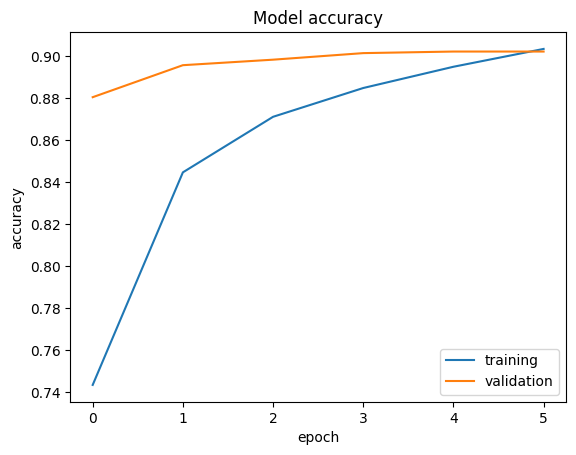

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["training", "validation"], loc="best")
plt.show()